In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [3]:
import os
data_path = '/content/drive/MyDrive/ColabNotebooks/MLops/data/'
# Walk through data files and list number of files
print("Dataset: ")
for dirpath, dirnames, filenames in os.walk(data_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Dataset: 
There are 8 directories and 0 images in '/content/drive/MyDrive/ColabNotebooks/MLops/data/'.
There are 0 directories and 500 images in '/content/drive/MyDrive/ColabNotebooks/MLops/data/Healthy'.
There are 0 directories and 500 images in '/content/drive/MyDrive/ColabNotebooks/MLops/data/Bacterial Canker'.
There are 0 directories and 500 images in '/content/drive/MyDrive/ColabNotebooks/MLops/data/Die Back'.
There are 0 directories and 500 images in '/content/drive/MyDrive/ColabNotebooks/MLops/data/Anthracnose'.
There are 0 directories and 500 images in '/content/drive/MyDrive/ColabNotebooks/MLops/data/Powdery Mildew'.
There are 0 directories and 500 images in '/content/drive/MyDrive/ColabNotebooks/MLops/data/Sooty Mould'.
There are 0 directories and 500 images in '/content/drive/MyDrive/ColabNotebooks/MLops/data/Gall Midge'.
There are 0 directories and 500 images in '/content/drive/MyDrive/ColabNotebooks/MLops/data/Cutting Weevil'.


In [22]:
import random
import matplotlib.pyplot as plt
def view_random_image(target_dir, target_class):
  # We will view image from here
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"Image shape {img.shape}")
  img.reshape((150,150))

  return img

Image shape (240, 320, 3)


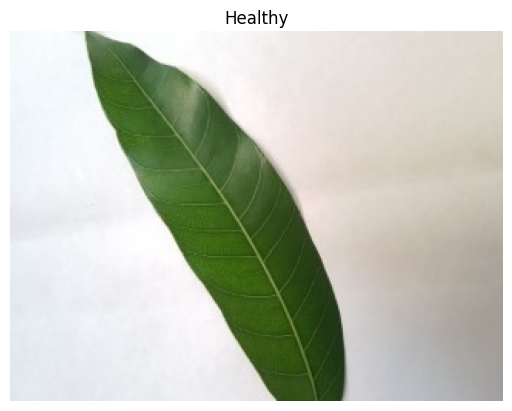

In [5]:
img = view_random_image(target_dir=data_path,
                  target_class='Healthy')

In [28]:
# Create training and validation sets from data directory
train_data = tf.keras.utils.image_dataset_from_directory(data_path ,validation_split=0.2, label_mode='categorical', subset='training',
                                                            seed=10, image_size=(150,150), batch_size=32)
valid_data = tf.keras.utils.image_dataset_from_directory(data_path, validation_split=0.2, label_mode='categorical', subset='validation',
                                                         seed=10, image_size=(150,150), batch_size=32)
# Get list of classes
import pathlib
data_dir = pathlib.Path(data_path)
classes = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(classes)

Found 4000 files belonging to 8 classes.
Using 3200 files for training.
Found 4000 files belonging to 8 classes.
Using 800 files for validation.
['Anthracnose' 'Bacterial Canker' 'Cutting Weevil' 'Die Back' 'Gall Midge'
 'Healthy' 'Powdery Mildew' 'Sooty Mould']


In [7]:
model_1 = Sequential([tf.keras.Input((150,150,3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,678,952 (10.22 MB)

 Trainable params: 2,678,952 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_1 = model_1.fit(train_data, epochs=4,batch_size=32)

Epoch 1/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 456s 5s/step - accuracy: 0.2485 - loss: 90.3801
Epoch 2/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 788ms/step - accuracy: 0.4413 - loss: 1.4965
Epoch 3/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 838ms/step - accuracy: 0.6509 - loss: 0.9682
Epoch 4/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 805ms/step - accuracy: 0.7081 - loss: 0.8306


In [9]:
model_1.evaluate(valid_data)

25/25 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 0.6241 - loss: 1.5058


[1.5705567598342896, 0.6187499761581421]

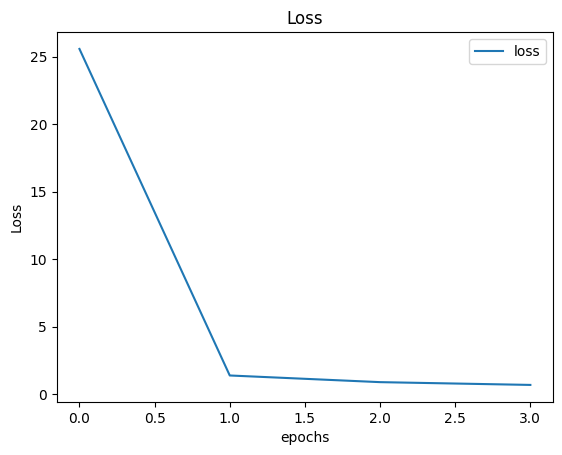

In [11]:
pd.DataFrame(history_1.history)[['loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss');

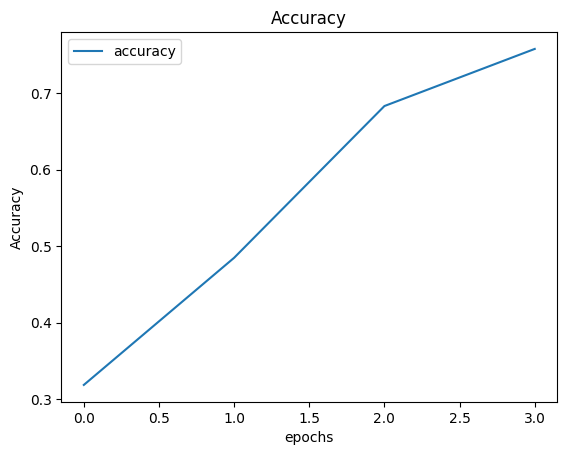

In [12]:
pd.DataFrame(history_1.history)[['accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');

In [30]:
model_1.save('/content/drive/MyDrive/ColabNotebooks/MLops/model', zipped=False)

In [17]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/MLops/model.keras')

In [18]:
model_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,036,858 (30.66 MB)

 Trainable params: 2,678,952 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,357,906 (20.44 MB)

In [25]:
from PIL import Image
import numpy as np
from skimage import transform
def process(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [29]:
pred_label=model_loaded.predict(process('/content/drive/MyDrive/ColabNotebooks/MLops/data/Healthy/20211231_123105 (Custom).jpg'))
print(classes[np.argmax(pred_label)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Healthy
